# MCS 320 Project Three: Models of Springs

We use SageMath to explore a model of springs, solving a second order differential equation, plotting its solutions, and making an animation.

#### 1. Stretching Rubber

Consider a rubber band suspension from the ceiling with a mass attatched to it. The independent variable is time $t$ and we want to model the height of the mass by $y(t)$. The problem has three parameters:

1. the mass $m$,
2. the gravitational constant $g$, and
3. the stretch coefficient $s$.

All three parameters are positve numbers.
The second order differential equation which governs the height of the mass is

$$
m \frac {d^2}{dt^2}y(t) = - \frac {mg}{s}y(t)
$$

The initial values are $y(0) = -1/5 $ and $ y'(0) = 0$

# <u>Assignment One:</u>

#### Define this problem using symbols m, g, and s for three parameters.

#### 1.1 Compute the expression of the solution

In [1]:
m = var('m', domain='positive') # mass
g = var('g', domain='positive') # gravitational constant
s = var('s', domain='positive') # stretch coefficient
t = var('t', domain='positive') # time, independent variable

In [2]:
y = function('y')(t)

In [3]:
ode = m*diff(y, 2) == (-m*g/s)*y
show(ode)

m*diff(y(t), t, t) == -g*m*y(t)/s

In [4]:
# desolve
# t as independent variable
sol = desolve(ode, y, ivar=t)
sol

_K2*cos(sqrt(g)*t/sqrt(s)) + _K1*sin(sqrt(g)*t/sqrt(s))

In [5]:
# initial conditions
# [0,-1/5]
# velocity = 0
sol = desolve(ode, y, ivar=t, ics = [0, -1/5, 0])
sol

-1/5*cos(sqrt(g)*t/sqrt(s))

In [6]:
sol.show()

-1/5*cos(sqrt(g)*t/sqrt(s))

#### 1.2 Use m = 2, g = 10, s = 0.01, as numerical values of the parameters and use the initial values to compute a particular solution.

In [7]:
# psol = particular solution
# mass = 2
# gravitational constant = 10
# stretch coefficient = 0.01
psol = sol(m=2, g=10, s=0.01)
psol.show()

-1/5*cos(10.0000000000000*sqrt(10)*t)

#### 1.3 Compute the period P of the numerical solution: y(P) = y(0). The solution y(t) makes one full cycle for t ∈ [0, $P$]

In [8]:
# initial value y(0) = -1/5
def y(t):
    if (t == 0):
        return -1/5

y(P) = y(0)
y(P)

-1/5

#### 1.4 Make a plot of y(t) for y ∈ [0, $P$]

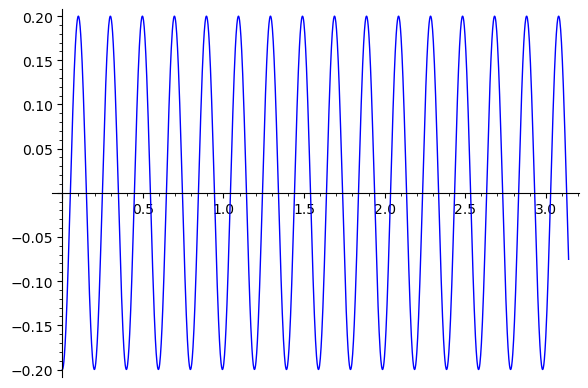

In [9]:
# plot particular solution, between [0, pi]
# A simple cos(t) has period 2*pi, and cos(2*t) runs twice as fast, so the period is pi.
plot(psol, (t, 0, pi))

In [10]:
# initial angle
RR(1/5)

0.200000000000000

In [11]:
sin(RR(1)/5)

0.198669330795061

# <u>Assignment Two:</u>

#### Make an animation with 20 frames as shown below:

The ceiling is set at y = 1, which is the maximum value for y in the animation window. 

The minimum value for y is set at −1. 

The height y(t) is computed by the particular solution of Assignment One. 

The size of the point which represents the mass is 200 and remains fixed during the simulation.

###### To simulate the stretching of the rubber band, the thickness starts at one and increases by one in each frame as the mass moves up. When the mass moves down, the thickness decreases by one in each step. Observe that the mass is at its highest point in the eleventh frame.

In [12]:
# The height y(t) is computed by the particular solution of Assignment One.
y(t) = psol
def height(k):
    if (k < 11):
        return y(k)
    if (k == 11): return y(10)
    if (k == 12): return y(9)
    if (k == 13): return y(8)
    if (k == 14): return y(7)
    if (k == 15): return y(6)
    if (k == 16): return y(5)
    if (k == 17): return y(4)
    if (k == 18): return y(3)
    if (k == 19): return y(2)
    if (k == 20): return y(1)
def thickness(k):
    if (k < 11): return k
    if (k == 11): return 10
    if (k == 12): return 9
    if (k == 13): return 8
    if (k == 14): return 7
    if (k == 15): return 6
    if (k == 16): return 5
    if (k == 17): return 4
    if (k == 18): return 3
    if (k == 19): return 2
    if (k == 20): return 1

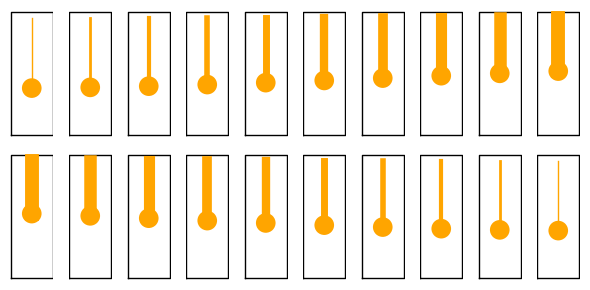

In [13]:
movinglines = [line([(0,-1),(2,-1),(2,1.1),(0,1.1), (0,-1)], color='black') # border
               + point((1,height(k)), color='orange',size=200) # point size, start from 1, to height(k) which is particular solution from problem 1
               + line([(1,1),(1, height(k))],color='orange', thickness=thickness(k)) # line with height = y(t), and thickness(k)
               for k in range(1,21)]

a = animate(movinglines,figsize=1,xmin=-1,xmax=1,ymin=-1,ymax=1)
g = a.graphics_array(ncols=10)
g.show(axes=False, figsize=[6,3])

# <u>Assignment Three:</u>

#### Use the frames of the animation to make an interact:

###### The parameter in the slider is the frame number, which ranges from 0 to 19, incrementing by 1, and initially set at 10.

In [14]:
@interact
def frame(x0 = slider(0, 19, 1,10, label='frame no')):
    P1 = line([(-1,0),(1,0)],color = 'black', ymin=-1, ymax=1)
    P2 = point((0, height(x0)), color='orange', size=200)
    P3 = line([(0,1),(0, height(x0))],color='orange', thickness=thickness(x0))
    P = P1 + P2 + P3
    P.show(figsize=6)

Interactive function <function frame at 0x7fddfa1aa9e0> with 1 widget
  x0: TransformIntSlider(value=10, descr…

#### 2. Adding Damping

Adding damping, we can model a car suspension mechanism. Imagine what happens when a car hits pothole or a bump in the road.

The second order differential equation which governs the height with damping coefficient $b$ is

$$
m \frac {d^2}{dt^2}y(t) = -b \frac {d}{dt}y(t) - \frac{mg}{s}y(t)
$$

# <u>Assignment Four:</u>

#### Define this problem symbolically:

1. Compute an expression for the solution, assuming, $b^2 - 4gm^2 > 0$
2. Use b = 25, s = 0.1, g = 10, m =1 for the values of parameters and the initial values y(0) = 0.1 = 0 to compute a particular solution.
3. Make a plot of the solution for t E [0,1]

In [15]:
reset()

Let's define the variables we are going to use for our expression

In [16]:
b = var('b', domain='positive')
s = var('s', domain='positive')
g = var('g', domain='positive')
m = var('m', domain='positive')
y = var('y', domain='positive')

$$
\frac {d}{dt}y(t) = -by(t) - \frac{mg}{s}y(t)
$$

In [17]:
b = 25
s = 0.1
g = 10
m = 1
rhs = [y, -b*y - (m*g/s)*y]
rhs

[y, -125.000000000000*y]

In [18]:
initc = [1, 0]
initc

[1, 0]

In [19]:
endtime = 2*RR(pi)
step = 0.1
timerange = srange(0, endtime, step)

In [20]:
sol = desolve_odeint(rhs, initc, timerange,[y,y])

In [21]:
angles = sol[:, 0]
pts = [(x, y) for (x, y) in zip(timerange, angles)]

In [22]:
p = line(pts)

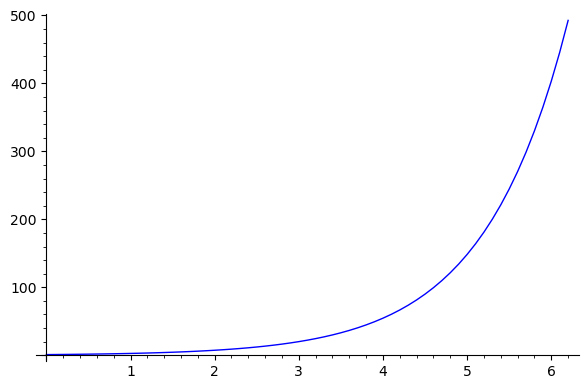

In [23]:
p.show()